In [1]:
#load the packages:
import pandas as pd
import numpy as np
import sklearn
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Q1. Load the exercise.csv file. Find the average product rating and append it onto this dataframe. Name the column as "Average_rating".**

In [31]:
#write your code here:
exercise=pd.read_csv("exercise.csv")
product_ratings = exercise.groupby(["asin"]).agg("mean")
new_exercise = pd.merge(exercise,product_ratings,on="asin",how="right")
new_exercise = new_exercise.drop(labels = ["unixReviewTime_x","Unnamed: 0_y","unixReviewTime_y"],axis=1)
new_exercise = new_exercise.rename(columns={"overall_x": "overall", "overall_y": "Average_rating"})
new_exercise

/var/folders/hp/044b3d290pl4z6jb7_7cnfm40000gp/T/ipykernel_96831/1277456810.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_ratings = exercise.groupby(["asin"]).agg("mean")


,Unnamed: 0_x,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,reviewTime,Average_rating
0,0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,"06 2, 2013",2.400000
1,1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,"11 25, 2010",2.400000
2,2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,"09 9, 2010",2.400000
3,3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS","11 24, 2010",2.400000
4,4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support","09 29, 2011",2.400000
...,...,...,...,...,...,...,...,...,...,...
995,995,AMGIMGPA34FIZ,9983891212,Victor Kirkpatrick,"[1, 1]",Quality of connection and video seems good wit...,5.0,"This mini HDMI cable, well, it works","04 29, 2011",4.698795
996,996,A22XH75Z0895RC,9983891212,weave,"[0, 0]",What is there to say? I needed a cable to run...,5.0,Good cable,"06 26, 2013",4.698795
997,997,A2XVGWQZN26LX9,9983891212,William J. Weisensee,"[0, 0]",I can find nothing wrong with this cable. It ...,5.0,Premium Canon Mini HDMI cable (10 ft),"11 16, 2013",4.698795
998,998,A2UFAKH7Y8VH5N,9983891212,WilliWu,"[12, 12]",Works perfectly at 1080p HD and in all other C...,5.0,Perfect for Canon EOS 7d,"04 7, 2010",4.698795



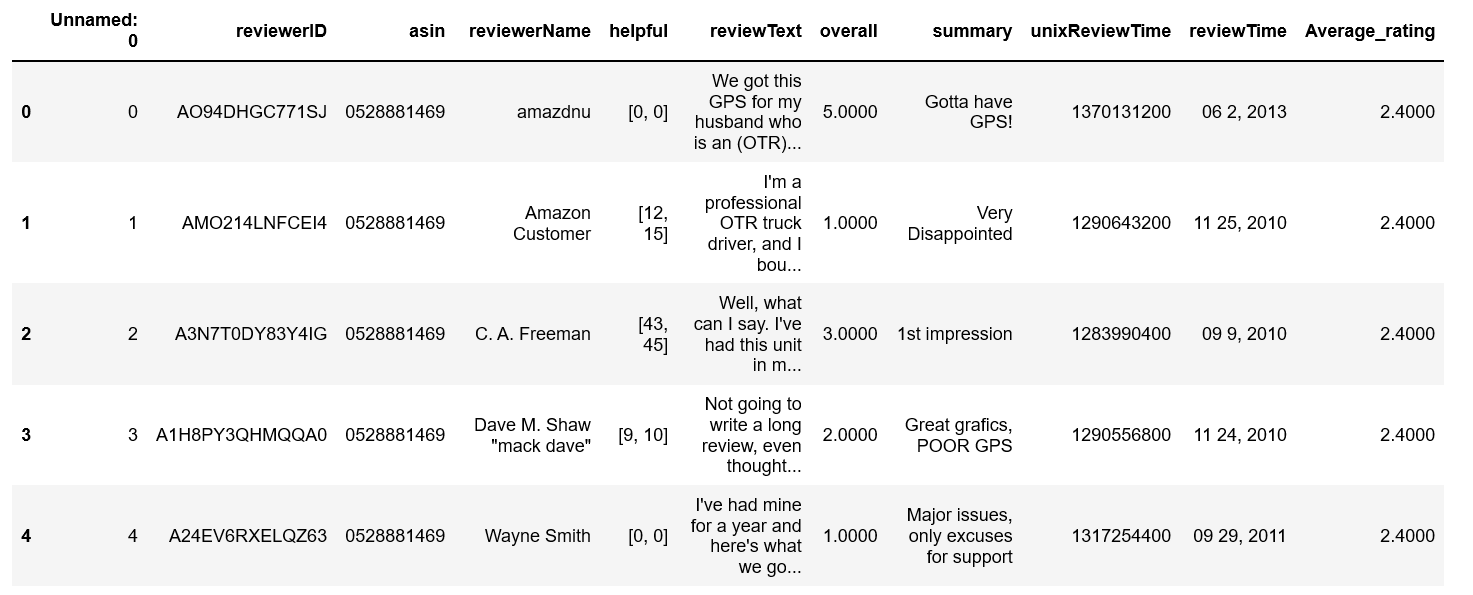

In [3]:
#Output looks like:
#do not code in this cell

**Q2. Find the total number of reviews posted by each reviewer and append this information onto the dataframe you have created in Q1. Name the column as "Total_reviews". Sort the dataframe by ascending asin and descending order of reviewer's total reviews.**

In [40]:
#write your code here:
total_ratings = exercise.groupby(["reviewerName"]).agg("count")
newer_exercise = pd.merge(new_exercise,total_ratings,on="reviewerName",how="left")
newer_exercise = newer_exercise.drop(labels = ["Unnamed: 0","reviewerID_y","asin_y","helpful_y","reviewText_y","summary_y","unixReviewTime","reviewTime_y"],axis=1)
newer_exercise = newer_exercise.rename(columns={"overall_y": "Total_reviews"})
newer_exercise = newer_exercise.sort_values(by='asin_x', ascending=True)
final_exercise = newer_exercise.sort_values(by='Total_reviews',ascending=False)
final_exercise

,Unnamed: 0_x,reviewerID_x,asin_x,reviewerName,helpful_x,reviewText_x,overall_x,summary_x,reviewTime_x,Average_rating,Total_reviews
921,921,AK3D1F2TEULT0,9983891212,Amazon Customer,"[0, 0]","As everyone should know, any HDMI cable should...",5.0,Great Product and Cheap,"01 1, 2012",4.698795,20.0
240,240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance","02 15, 2012",3.953488,20.0
239,239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,"08 15, 2013",3.953488,20.0
302,302,A3NS3XXZCQ5ATQ,1400501776,Amazon Customer,"[3, 4]","Honestly, I was really just interested in gett...",3.0,"A nice reader, but don't expect tablet capabil...","07 27, 2013",4.150000,20.0
366,366,A37E5KVAKOZFVS,1400532655,Amazon Customer,"[11, 11]",I have been working on my fiction writing skil...,4.0,Very nice eReader with tablet functionality,"02 19, 2011",3.807339,20.0
...,...,...,...,...,...,...,...,...,...,...,...
18,18,A20XXTXWF2TCPY,0972683275,NaN,"[0, 0]","This is a great buy, compared to a $60 or more...",5.0,Excelant mount for Tv. Would buy more if I nee...,"07 12, 2014",4.461187,NaN
361,361,A3JZ898Q8XXL6K,1400532655,NaN,"[0, 0]",Not worth saving a few bucks. Go with an iPad.,1.0,Not user friendly. Very time consuming to find...,"07 14, 2014",3.807339,NaN
595,595,AUTNL9E3MTR4M,1400698987,NaN,"[0, 0]","perfect, as described Thank you",5.0,Five Stars,"07 17, 2014",4.214286,NaN
623,623,AYC7L2YJMZOOC,1400699169,NaN,"[0, 0]",A year after Barnes and Noble dropped the pric...,5.0,Great Value! Don't wait too long... they are ...,"07 14, 2014",4.500000,NaN



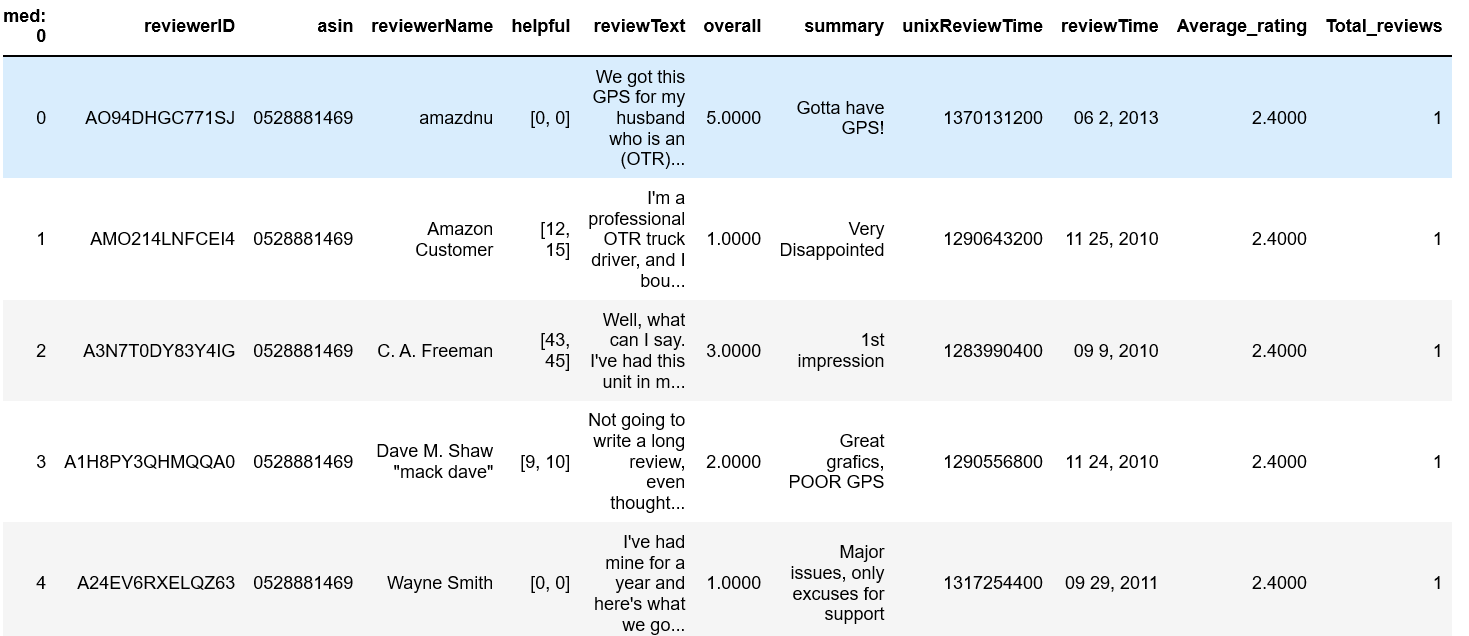

In [4]:
#Output looks like:
#do not code in this cell